In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('data.csv', header=None)

In [3]:
raw_data.head()

,0,1,2,3,4,5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


In [4]:
raw_data.values[:3]  # show the first three rows as an array

array([['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM'],
       ['8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM', '8:45 AM', '8:20 AM'],
       ['8:45 AM', '8:20 AM', '8:05 AM', '8:00 AM', '8:05 AM', '8:00 AM']],
      dtype=object)

### Put the data in a single array

In [5]:
data = raw_data.values.reshape(-1)
data.shape

(138,)

In [6]:
data[:10], data[-10:]  # show the beginning and the end of data

(array(['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM',
        '8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM'], dtype=object),
 array(['9:00 AM', '8:57 AM', '8:57 AM', '8:50 AM', '8:45 AM', '8:50 AM',
        '8:30 AM', '8:45 AM', '8:50 AM', '8:10 AM'], dtype=object))

In [7]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_text = time_text.strip()  # remove any unexpected spaces
        hours_minutes, _, am_pm = time_text.partition(' ')
        hours, _, minutes = hours_minutes.partition(':')
        hours = int(hours)
        hours -= 9  # 9:00 AM is zero
        if am_pm[0].lower() == 'p':
            hours += 12
        minutes = int(minutes)
        return hours*60 + minutes
    except ValueError:
        return None

In [8]:
# should be 0
convert_time_to_minutes("9:00 am")

0

In [9]:
# should be -3
convert_time_to_minutes("8:57 am")

-3

In [10]:
# should be 240
convert_time_to_minutes("1:00 pm")

240

In [11]:
# should be 180
convert_time_to_minutes("12:00 pm")  # why is this an edge case?

900

In [12]:
pd.Timestamp('july 4, 1776')

Timestamp('1776-07-04 00:00:00')

### Oops!
Maybe we shouldn't write our own time logic.

#### Note: there are two things in Python you _never_ want to reinvent from scratch:

1. CSV parsing: use `csv.reader` or `pd.read_csv`
2. Time/date logic: use `pd.Timestamp` or `datetime.datetime`

In [13]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError:
        return None
    

In [14]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in data]

In [15]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [16]:
x_label = 'Minutes (negative is early, zero is on time, positive is late)'
y_label = 'Count'
hist_title = 'Student On-Time Performance'

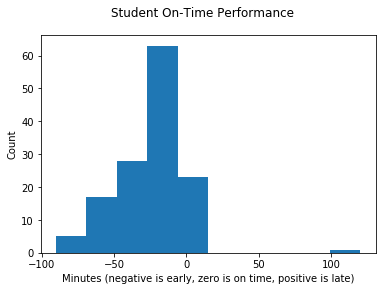

In [17]:
fig, ax = plt.subplots()
ax.hist(y)  # Use the default number of bins
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

That's not bad, but maybe more detail would be interesting!

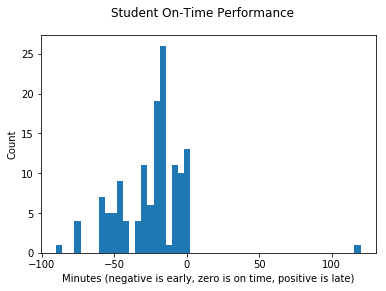

In [18]:
fig, ax = plt.subplots()
ax.hist(y, bins=50)  # More bins is better, right?
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

That seems a bit too sparse.

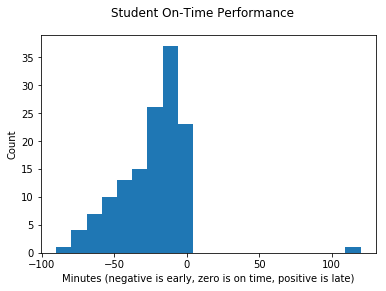

In [19]:
fig, ax = plt.subplots()
ax.hist(y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

---

---

# Step 2: Fit a distribution

Which of these distributions would be _most likely_ to have generated the data?

Create a program that can generate similar data using `scipy.stats.<distribution>.rvs()`?

> To me the arrival times look `normal`.  
> Below is Miles' starter code:

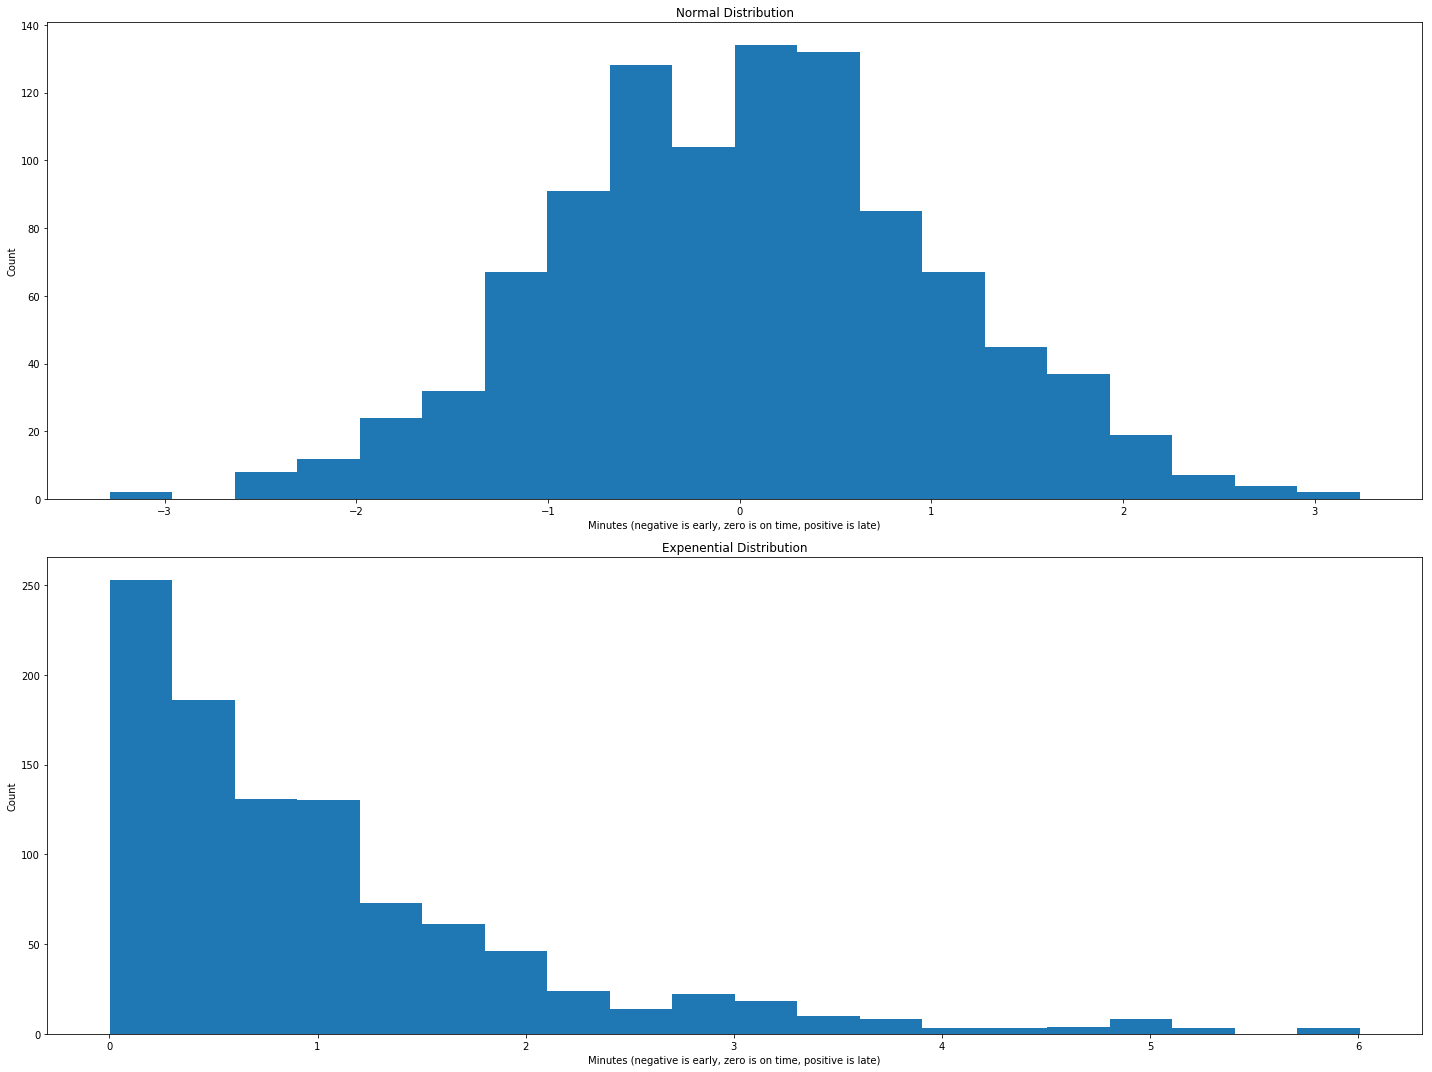

In [20]:
from scipy import stats

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

# Create some fake data with a normal distribution
normal_dist = stats.norm(loc=0, scale=1)
fake_y = normal_dist.rvs(1000)  

# Plot the data from the normal distribution
ax = axs[0]
ax.hist(fake_y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Normal Distribution")

# Create some fake data with an exponential distribution
exponential_dist = stats.expon(loc=0, scale=1)
fake_y = exponential_dist.rvs(1000)  

# Plot the data from the exponential distribution
ax = axs[1]
ax.hist(fake_y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Expenential Distribution")

# Show the plots
plt.tight_layout()
plt.show()

## Test for Normal Distribution

Let's try to overall the real data over 'fake' data for a `normal` distribution.

In [29]:
# Set seed
np.random.seed(1111)

# Make my own fake data
norm_dist = stats.norm(loc = 0, scale = 1)
y_fake = norm_dist.rvs(size=10000)


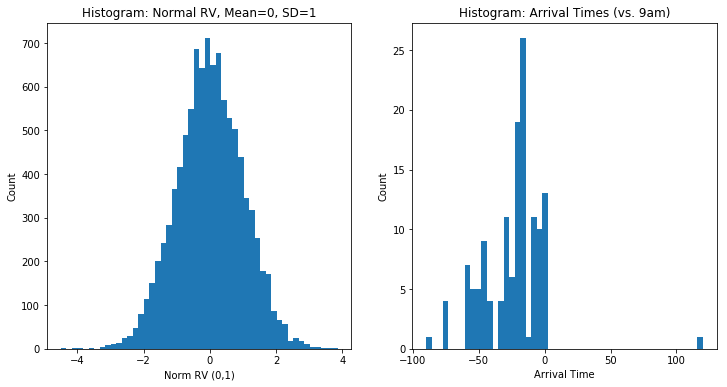

In [44]:
#Plot the fake normal data and the arrival time data
fig, ax = plt.subplots(1,2,figsize=(12,6))

x_lab_1 = "Norm RV (0,1)"
y_lab_1 = "Count"
title_1 = "Histogram: Normal RV, Mean=0, SD=1"

ax[0].hist(y_fake, bins=50)
ax[0].set_xlabel(x_lab_1)
ax[0].set_ylabel(y_lab_1)
ax[0].set_title(title_1)

x_lab_2 = "Arrival Time"
y_lab_2 = "Count"
title_2 = "Histogram: Arrival Times (vs. 9am)"

ax[1].hist(y, bins=50)
ax[1].set_xlabel(x_lab_2)
ax[1].set_ylabel(y_lab_2)
ax[1].set_title(title_2)

# Show Me
plt.show()

To me it looks `normal` but it is a small sample size.  

Let's run with it and try to use the sample parameters. 

In [49]:
# What is mean and standard deviaion of the arrival time data
arrivals_mean = np.mean(y)
arrivals_std = np.std(y)
# print(arrivals_mean)
# print(arrivals_std)

# Now make NEW fake data based on these parameters
norm_arrivals = stats.norm(loc=arrivals_mean, scale=arrivals_std)
y_fake_arrivals = norm_arrivals.rvs(size=10000)

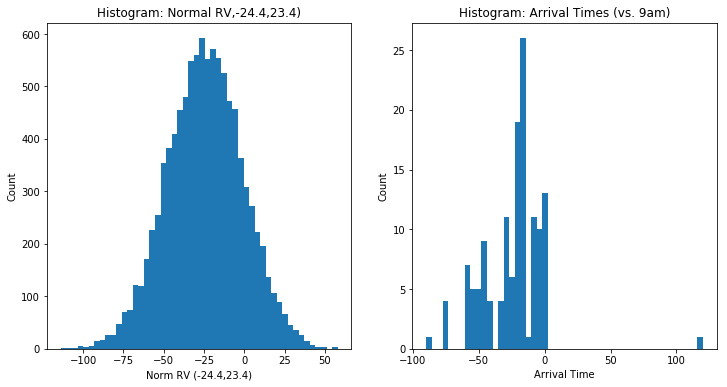

In [65]:
#Plot the fake arrival data with the parameters from the arrival time data
fig, ax = plt.subplots(1,2,figsize=(12,6))

x_lab_1 = "Norm RV (" + str(round(arrivals_mean,1)) + ',' + str(round(
    arrivals_std,1)) + ')'
y_lab_1 = "Count"
title_1 = "Histogram: Normal RV," + str(round(arrivals_mean,1)) + ',' + str(
    round(arrivals_std,1)) + ')'

ax[0].hist(y_fake_arrivals, bins=50)
ax[0].set_xlabel(x_lab_1)
ax[0].set_ylabel(y_lab_1)
ax[0].set_title(title_1)

x_lab_2 = "Arrival Time"
y_lab_2 = "Count"
title_2 = "Histogram: Arrival Times (vs. 9am)"

ax[1].hist(y, bins=50)
ax[1].set_xlabel(x_lab_2)
ax[1].set_ylabel(y_lab_2)
ax[1].set_title(title_2)

# Show Me
plt.show()

¯\_(ツ)_/¯

I did find a normality test in `scipy`:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [94]:
k, p = stats.normaltest(y)
p

7.930547378338131e-13

Based on the docs, it seems that the null hypothesis is that the data **IS** 
distributed as described. 

So if we consider $\alpha$=0.05, then since the p-value is smaller, then it
is highly unlikely the data is `normal`.

We can back into a confirmation of this. Let's use the `y_fake` data that we 
**know** is `normally` distributted.

In [98]:
k_fake, p_fake = stats.normaltest(y_fake)
p_fake

0.24647372957445138

P-value > .05 so doesn't fail.

OK, so it definitely is not `normal`.


Now I want to test vs `Exponential` Distribution.

---

## Test for Exponential Distribution

Miles has a good point. Being late is a rare event, so really, if you ignore postive times and 'flip' the data, it kinda looks `exponential`!

In [84]:
y_neg = np.array([np.negative(item) for item in y if item <= 0])


In [85]:
# y_neg = np.negative(y)
# y_neg

In [88]:
# Create some fake data with an exponential distribution
exp_arrivals = stats.expon(loc=arrivals_mean, scale=arrivals_std)
y_arrivals_exp = exp_arrivals.rvs(10000)  

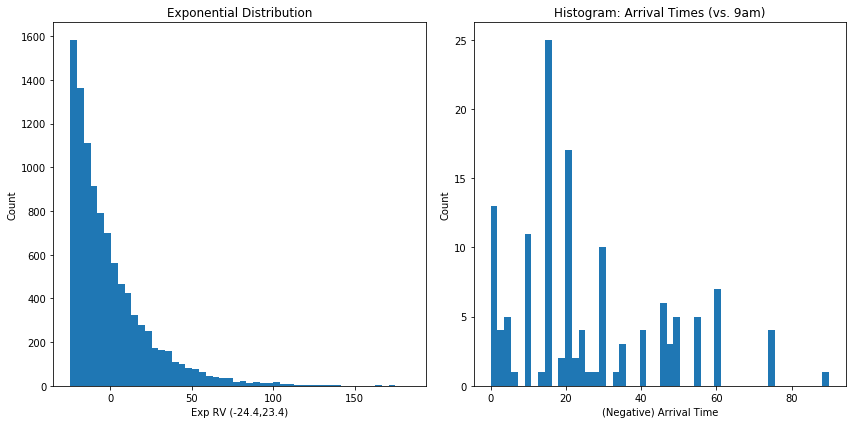

In [89]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x_lab_1 = "Exp RV (" + str(round(arrivals_mean,1)) + ',' + str(round(
    arrivals_std,1)) + ')'
y_lab_1 = "Count"
title_1 = "Histogram: Exp RV," + str(round(arrivals_mean,1)) + ',' + str(
    round(arrivals_std,1)) + ')'

# Plot the data from the exponential distribution
ax[0].hist(y_arrivals_exp, bins=50)  # Let's try something in between
ax[0].set_xlabel(x_lab_1)
ax[0].set_ylabel(y_lab_1)
ax[0].set_title(title_1)
ax[0].set_title("Exponential Distribution")

x_lab_2 = "(Negative) Arrival Time"
y_lab_2 = "Count"
title_2 = "Histogram: Arrival Times (vs. 9am)"

ax[1].hist(y_neg, bins=50)
ax[1].set_xlabel(x_lab_2)
ax[1].set_ylabel(y_lab_2)
ax[1].set_title(title_2)

# Show the plots
plt.tight_layout()
plt.show()

Pretty sparse. Let's try less bins.

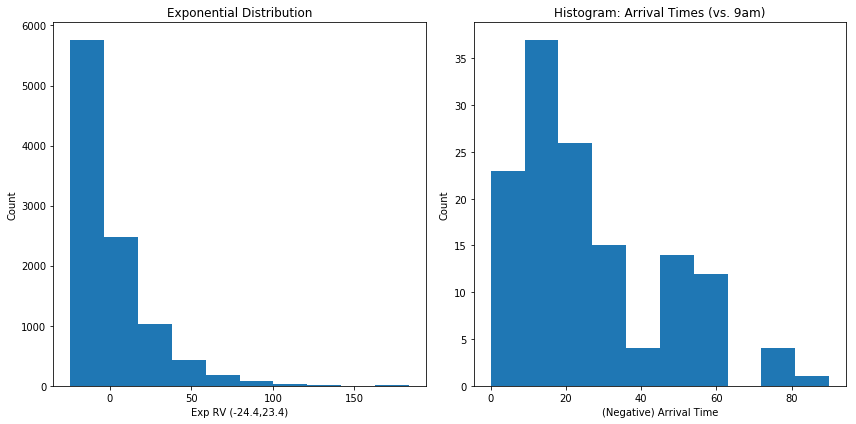

In [100]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x_lab_1 = "Exp RV (" + str(round(arrivals_mean,1)) + ',' + str(round(
    arrivals_std,1)) + ')'
y_lab_1 = "Count"
title_1 = "Histogram: Exp RV," + str(round(arrivals_mean,1)) + ',' + str(
    round(arrivals_std,1)) + ')'

# Plot the data from the exponential distribution
ax[0].hist(y_arrivals_exp, bins=10)  # Let's try something in between
ax[0].set_xlabel(x_lab_1)
ax[0].set_ylabel(y_lab_1)
ax[0].set_title(title_1)
ax[0].set_title("Exponential Distribution")

x_lab_2 = "(Negative) Arrival Time"
y_lab_2 = "Count"
title_2 = "Histogram: Arrival Times (vs. 9am)"

ax[1].hist(y_neg, bins=10)
ax[1].set_xlabel(x_lab_2)
ax[1].set_ylabel(y_lab_2)
ax[1].set_title(title_2)

# Show the plots
plt.tight_layout()
plt.show()

Kind of? I can't find a similar test for expontial distribution. So I'll leave it at that.

---

Test edit.